In [1]:
import face_alignment
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm

In [18]:
vid = cv2.VideoCapture('george_exercise.mp4')
frames = []
while True:
    success, frame = vid.read()
    if not success:
        break
    
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frames.append(frame)

In [19]:
import signal_detection

In [20]:
#landmarks = signal_detection.landmark_detection(frames[0])

In [21]:
#rgb = signal_detection.roi_average_rgb(frames[0], landmarks)

In [22]:
#plt.imshow(frames[0])
#plt.scatter(np.stack(rgb, axis=0)[:, 0], np.stack(rgb, axis=0)[:, 1], s=0.01)

In [23]:
landmarks = np.load('landmarks_exercise.npy', allow_pickle=True)

In [24]:
for x in landmarks:
    if type(x) != np.ndarray:
        print(x)

In [25]:
from HeartAttributes import HeartAttributes
tracker = HeartAttributes()

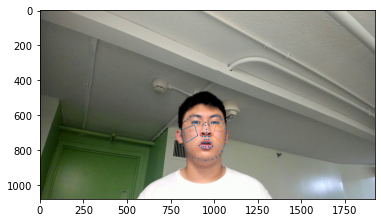

In [26]:
fr = 480
plt.imshow(frames[fr])
plt.scatter(landmarks[fr][:, 0], landmarks[fr][:, 1], 0.2)

for contour in signal_detection.draw_contours(frames[fr], landmarks[fr]).values():
    contour = np.append(contour, contour[0][None, ...], axis=0)
    plt.plot(contour[:, 0], contour[:, 1], linewidth=0.5)

In [27]:
signals = []
rgbs = []
for i in tqdm(range(len(landmarks))):
    if type(landmarks[i]) != np.ndarray:
        continue
    rgb = signal_detection.roi_average_rgb(frames[i], landmarks[i])
    if rgb is None:
        print('no rgb', i)
    if not tracker.is_acceptable(rgb):
        continue
    signals.append(tracker.update(rgb, i))
    rgbs.append(rgb)

100%|██████████| 1500/1500 [00:50<00:00, 30.00it/s]


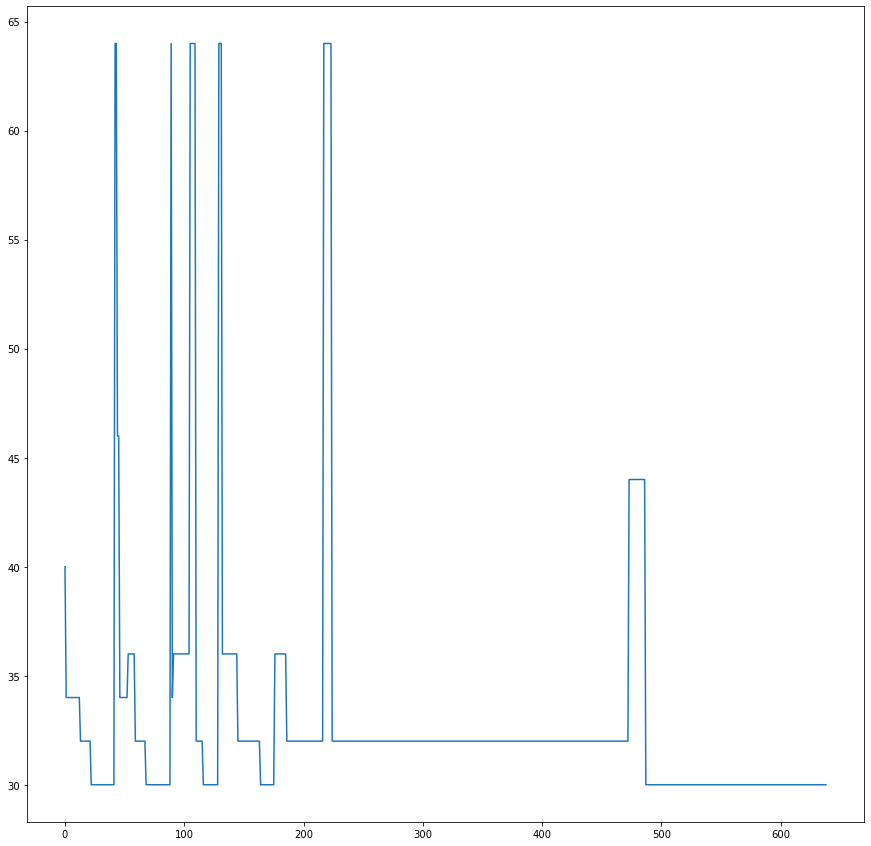

In [28]:
fig, ax = plt.subplots(figsize=(15,15))
#ax.plot(signals[750:1500])
greens = np.stack(rgbs[200:])[:, 2]
#ax.plot(0.9+(greens - np.mean(greens))/(60*np.std(greens)))
#ax.plot(np.stack(rgbs[200:])[:,1])
#ax.plot(np.stack(tracker.mas)[200:, 1])
#X, Y = signal_detection.get_signal(np.stack(rgbs)[200:])
#ax.plot((X - np.mean(X))/np.std(X))
#ax.plot((Y - np.mean(Y))/np.std(Y))
#ax.plot(X)
#ax.plot(Y)
ft_focus = np.stack(signals)[750:, 15:60]
max_freq = np.argmax(ft_focus, axis=1)
plt.plot((max_freq + 15)*2)